## Task 3
Carlos Andres Daza Rachen
J4134C

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares, brute
import random
import numdifftools as nd
from tabulate import tabulate

## First and Second Order Methods

In [6]:
def generate_ab(seed=None):
    if seed != None:
        random.seed(seed)
    return random.random(), random.random()
    
def generate_noisy(a, b):
    x = np.array([k/100 for k in range(100)])
    y = np.array([(a * xk + b + np.random.normal(0,1)) for xk in x])
    
    return x, y
    
def _linear(a, b, x):
    return a * x + b

def _rational(a, b, x):
    return a / (1 + b * x)

def linear(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]    
    return np.sum((_linear(a,b,x) - y)**2)

def rational(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]
    return np.sum((_rational(a, b, x) - y)**2)

def linear_resid(init_point, *args):
    a, b = init_point
    x, y = args[0], args[1]
    return abs(_linear(a, b, x) - y)

def rational_resid(init_point, *args):
    a, b = init_point
    x, y = args[0], args[1]
    return abs(_rational(a, b, x) - y)

In [28]:
a, b = generate_ab(5)
x, y = generate_noisy(a, b)
yk = a * x + b
init_point = np.array([a, b])


In [29]:
def gradient_descent(fx, init_point, x, y, e, alpha=1e-4):

    iter, f_iter = 0, 0

    while True:
        gradient = nd.Gradient(fx)(init_point, x, y)
        derivative = init_point - alpha * gradient        

        iter += 1
        f_iter += 1

        # if abs(derivative[0] - init_point[0]) > e or abs(derivative[1] - init_point[1]) > e:
        deriv_mag = np.sqrt((derivative[0]-init_point[0])**2 + (derivative[1]-init_point[1])**2)
        # print(deriv_mag, iter)
        if deriv_mag > e:
            init_point = derivative
        else:
            break

    init_point = derivative
    
    return init_point, iter, f_iter

## First and Second order methods

### Linear Function

In [24]:
print('Gradient Descent')
gd_linear = gradient_descent(linear, init_point, x, y, 0.001, alpha=0.0075)
print(f'Current function value: {linear(gd_linear[0], x, y)}')
print(f'Iterations: {gd_linear[1]}')
print(f'Function Calls: {gd_linear[2]}')
print(gd_linear[0], end='\n\n')

print('Conjugate Gradient Descent')
conjugate_linear = minimize(linear, [a, b], args=(x, y), method='CG', tol=0.001, options={'disp': True})
print(conjugate_linear['x'], end='\n\n')

print('Newton')
newton_linear = minimize(linear, init_point, args=(x, y), method='BFGS', tol=0.001, options={'disp': True})
print(newton_linear['x'], end='\n\n')

print('Levenberg-Marquadt')
levenberg_linear = least_squares(linear_resid, init_point, args=(x, y), method='lm', xtol=0.001)
print(f'Current function value: {levenberg_linear["cost"]}')
print(f'Function Calls: {levenberg_linear["nfev"]}')
print(levenberg_linear['x'], end='\n\n')



Gradient Descent
Current function value: 86.33698129826148
Iterations: 41
Function Calls: 41
[0.3952486  0.81247483]

Conjugate Gradient Descent
Optimization terminated successfully.
         Current function value: 86.336886
         Iterations: 9
         Function evaluations: 45
         Gradient evaluations: 15
[0.39255879 0.81438907]

Newton
Optimization terminated successfully.
         Current function value: 86.336886
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5
[0.39253037 0.8144047 ]

Levenberg-Marquadt
Current function value: 43.16844279324615
Function Calls: 6
[0.39253033 0.8144047 ]



### Rational Function

In [32]:
print('Gradient Descent')
gd_rational = gradient_descent(rational, init_point, x, y, 0.001, alpha=0.001)
print(f'Current function value: {rational(gd_rational[0], x, y)}')
print(f'Iterations: {gd_rational[1]}')
print(f'Function Calls: {gd_rational[2]}')
print(gd_rational[0], end='\n\n')

print('Conjugate Gradient Descent')
conjugate_rational = minimize(rational, [a, b], args=(x, y), method='CG', tol=0.001, options={'disp': True})
print(conjugate_rational['x'], end='\n\n')

print('Newton')
newton_rational = minimize(rational, init_point, args=(x, y), method='BFGS', tol=0.001, options={'disp': True})
print(newton_rational['x'], end='\n\n')

print('Levenberg-Marquadt')
levenberg_rational = least_squares(rational_resid, init_point, args=(x, y), method='lm', xtol=0.001)
print(f'Current function value: {levenberg_rational["cost"]}')
print(f'Function Calls: {levenberg_rational["nfev"]}')
print(levenberg_rational['x'], end='\n\n')

Gradient Descent
Current function value: 104.15931477447549
Iterations: 170
Function Calls: 170
[ 0.69473996 -0.51073699]

Conjugate Gradient Descent
Optimization terminated successfully.
         Current function value: 104.149000
         Iterations: 10
         Function evaluations: 84
         Gradient evaluations: 28
[ 0.68125916 -0.52788937]

Newton
Optimization terminated successfully.
         Current function value: 104.149000
         Iterations: 10
         Function evaluations: 57
         Gradient evaluations: 19
[ 0.68125957 -0.527889  ]

Levenberg-Marquadt
Current function value: 52.07449983177139
Function Calls: 20
[ 0.68125877 -0.52788995]



## Direct Methods

In [30]:
grid = (slice(a, b, 0.001), slice(a, b, 0.001))


### Linear function

In [33]:

print('Exhaustive Search')
exhaustive_linear = brute(linear, grid, args=(x, y), disp=True, full_output=True)
print(exhaustive_linear[0], end='\n\n')

print('Nelder-Mead')
nelder_linear = minimize(linear, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_linear['x'], end='\n\n')

print('Gauss (coordinate descent)')
gauss_linear = minimize(linear, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_linear['x'], end='\n\n')



Exhaustive Search
Optimization terminated successfully.
         Current function value: 104.510655
         Iterations: 24
         Function evaluations: 45
[0.68261404 0.62781436]

Nelder-Mead
Optimization terminated successfully.
         Current function value: 104.510657
         Iterations: 20
         Function evaluations: 38
[0.68224445 0.62802174]

Gauss (coordinate descent)
Optimization terminated successfully.
         Current function value: 104.510655
         Iterations: 3
         Function evaluations: 101
[0.68258732 0.62781398]



### Rational function

In [34]:
print('Exhaustive Search')
exhaustive_rational = brute(rational, grid, args=(x, y), disp=True, full_output=True)
print(exhaustive_rational[0])

print('Nelder-Mead')
nelder_rational = minimize(rational, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_rational['x'])

print('Gauss (coordinate descent)')
gauss_rational = minimize(rational, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_rational['x'])

Exhaustive Search
Optimization terminated successfully.
         Current function value: 104.149000
         Iterations: 57
         Function evaluations: 110
[ 0.68124699 -0.52790652]
Nelder-Mead
Optimization terminated successfully.
         Current function value: 104.149009
         Iterations: 35
         Function evaluations: 68
[ 0.68101375 -0.52835414]
Gauss (coordinate descent)
Optimization terminated successfully.
         Current function value: 104.169887
         Iterations: 4
         Function evaluations: 98
[ 0.69420982 -0.52353362]


## Table Report

In [35]:
headers = ['a', 'b', 'Fx value', 'Iterations', 'Fx calls']
index = ['Gradient Descent', 'Conjugate GD', 'Newton', 'Levenberg', 'Exhaustive', 'Gauss', 'Nelder-Mead']
table_linear = [
    [gd_linear[0][0], gd_linear[0][1], linear(gd_linear[0], x, y), gd_linear[1], gd_linear[2]],
    [conjugate_linear['x'][0], conjugate_linear['x'][1], conjugate_linear['fun'], conjugate_linear['nit'], conjugate_linear['nfev']],
    [newton_linear['x'][0], newton_linear['x'][1], newton_linear['fun'], newton_linear['nit'], newton_linear['nfev']],
    [levenberg_linear['x'][0], levenberg_linear['x'][1], levenberg_linear['cost'], levenberg_linear['nfev'], levenberg_linear['nfev']],
    [exhaustive_linear[0][0], exhaustive_linear[0][1], exhaustive_linear[1], len(exhaustive_linear[3]), len(exhaustive_linear[3])],
    [gauss_linear['x'][0], gauss_linear['x'][1], gauss_linear['fun'], gauss_linear['nit'], gauss_linear['nfev']],
    [nelder_linear['x'][0], nelder_linear['x'][1], nelder_linear['fun'], nelder_linear['nit'], nelder_linear['nfev']],
]

table_rational = [
    [gd_rational[0][0], gd_rational[0][1], rational(gd_rational[0], x, y), gd_rational[1], gd_rational[2]],
    [conjugate_rational['x'][0], conjugate_rational['x'][1], conjugate_rational['fun'], conjugate_rational['nit'], conjugate_rational['nfev']],
    [newton_rational['x'][0], newton_rational['x'][1], newton_rational['fun'], newton_rational['nit'], newton_rational['nfev']],
    [levenberg_rational['x'][0], levenberg_rational['x'][1], levenberg_rational['cost'], levenberg_rational['nfev'], levenberg_rational['nfev']],
    [exhaustive_rational[0][0], exhaustive_rational[0][1], exhaustive_rational[1], len(exhaustive_rational[3]), len(exhaustive_rational[3])],
    [gauss_rational['x'][0], gauss_rational['x'][1], gauss_rational['fun'], gauss_rational['nit'], gauss_rational['nfev']],
    [nelder_rational['x'][0], nelder_rational['x'][1], nelder_rational['fun'], nelder_rational['nit'], nelder_rational['nfev']],
]

## Plot

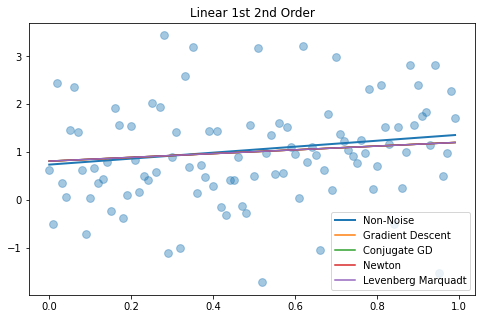

In [37]:
plt.figure(figsize=(8,5))
plt.title('Linear 1st 2nd Order')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, _linear(gd_linear[0][0], gd_linear[0][1], x), label='Gradient Descent')
plt.plot(x, _linear(conjugate_linear['x'][0], conjugate_linear['x'][1], x), label='Conjugate GD')
plt.plot(x, _linear(newton_linear['x'][0], newton_linear['x'][1], x), label='Newton')
plt.plot(x, _linear(levenberg_linear['x'][0], levenberg_linear['x'][1], x), label='Levenberg Marquadt')
plt.legend()
plt.show()

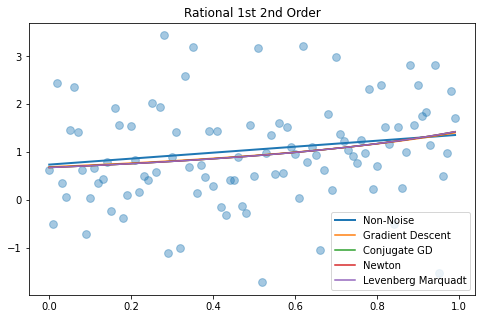

In [38]:
plt.figure(figsize=(8,5))
plt.title('Rational 1st 2nd Order')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, _rational(gd_rational[0][0], gd_rational[0][1], x), label='Gradient Descent')
plt.plot(x, _rational(conjugate_rational['x'][0], conjugate_rational['x'][1], x), label='Conjugate GD')
plt.plot(x, _rational(newton_rational['x'][0], newton_rational['x'][1], x), label='Newton')
plt.plot(x, _rational(levenberg_rational['x'][0], levenberg_rational['x'][1], x), label='Levenberg Marquadt')
plt.legend()
plt.show()

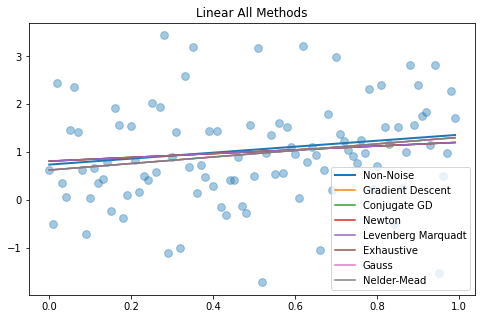

In [39]:
plt.figure(figsize=(8,5))
plt.title('Linear All Methods')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
# 1st 2nd order
plt.plot(x, _linear(gd_linear[0][0], gd_linear[0][1], x), label='Gradient Descent')
plt.plot(x, _linear(conjugate_linear['x'][0], conjugate_linear['x'][1], x), label='Conjugate GD')
plt.plot(x, _linear(newton_linear['x'][0], newton_linear['x'][1], x), label='Newton')
plt.plot(x, _linear(levenberg_linear['x'][0], levenberg_linear['x'][1], x), label='Levenberg Marquadt')
# direct methods
plt.plot(x, _linear(exhaustive_linear[0][0], exhaustive_linear[0][1], x), label='Exhaustive')
plt.plot(x, _linear(gauss_linear['x'][0], gauss_linear['x'][1], x), label='Gauss')
plt.plot(x, _linear(nelder_linear['x'][0], nelder_linear['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()

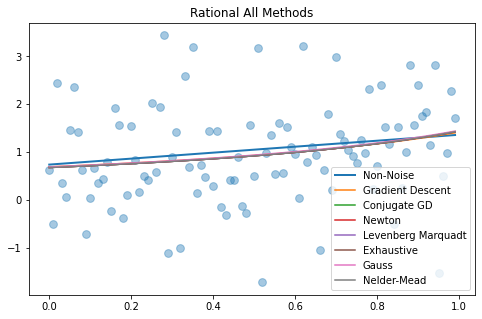

In [40]:
plt.figure(figsize=(8,5))
plt.title('Rational All Methods')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
# 1st 2nd order methods
plt.plot(x, _rational(gd_rational[0][0], gd_rational[0][1], x), label='Gradient Descent')
plt.plot(x, _rational(conjugate_rational['x'][0], conjugate_rational['x'][1], x), label='Conjugate GD')
plt.plot(x, _rational(newton_rational['x'][0], newton_rational['x'][1], x), label='Newton')
plt.plot(x, _rational(levenberg_rational['x'][0], levenberg_rational['x'][1], x), label='Levenberg Marquadt')
# direct methods
plt.plot(x, _rational(exhaustive_rational[0][0], exhaustive_rational[0][1], x), label='Exhaustive')
plt.plot(x, _rational(gauss_rational['x'][0], gauss_rational['x'][1], x), label='Gauss')
plt.plot(x, _rational(nelder_rational['x'][0], nelder_rational['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()